# Scikit-Learnの導入

## Scikit-Learnでのデータ表現
### 表としてのデータ

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


この表では、行がサンプルした1点となっており、表の行数を`n_samples`と表記する。

一方、各行のデータはそれぞれのサンプルと描写する情報の特定の量である。一般にマトリックスの列は特徴量として扱われ、その列数を`n_features`と表記する。

#### 特徴マトリックス
上記の表は2次元の表で、これを特徴マトリックスと呼ぶこととする。この特徴マトリックスはしばしば`X`と命名される。

特徴マトリックスは2次であると仮定され、その形状は`[n_samples, n_features]`であり、たいていがNumPyのarrayかPandasの`DataFrame`を含む。

#### ターゲット配列
特徴マトリックス`X`に加えて、慣例的に`y`とよく呼ばれるラベル配列もしくはターゲット配列も一般的に利用する。ターゲット配列は普通1次元であり、その長さは`n_samples`である。たいていがNumPy arrayかPandasの`Series`である。ターゲット配列は連続値か、不連続のクラスかラベルである。いくつかのScikit-Learnの予測では複数ターゲットの値を扱い、それは2次元の`[n_samples, n_targets]`の形のターゲット配列であるが、ここでは主に1次元のターゲット配列として説明する。

ターゲット配列と特徴マトリックスとの違いは、データから予測したいものかどうかである。統計的な用語では従属変数である。例えば、今の例では他の測定量から花の種を予測したいため、`species`がターゲット配列となる。

このターゲット配列を頭に入れて、データをまずは可視化してみる。

/home/sasaki/.pyenv/versions/miniconda3-4.3.30/envs/ml_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


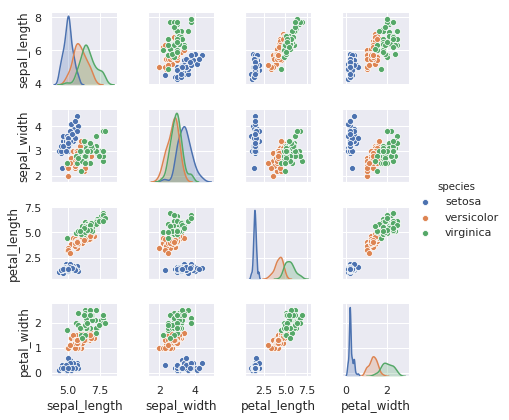

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

Scikit-Learnで利用するために、`DataFrame`から特徴マトリックスとターゲット配列を取り出す。

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-LearnのEstimator API

### APIの基礎
ほぼたいていの場合、Scikit-Learnのestimator APIの使用ステップは以下の通りである。

1. Scikit-Learnから適切なestimator classをインポートしてモデルのクラスを選択する
2. 所望の値とともにこのクラスをインスタンス化し、モデルのハイパーパラメータを選択する
3. 特徴マトリックスとターゲット配列をデータから作成する
4. モデルのインスタンスの`fit()`メソッドを予備、データをモデルにフィットさせる
5. モデルを新しいデータに対して適用する
  - 教師あり学習に対しては`predict()`メソッドを利用して未知のデータに対してラベルを予測する
  - 教師なし学習に対しては`transform()`か`predict()`メソッドを使用してデータのプロパティに変換するか推論する

### 教師あり学習の例：シンプルな線形回帰

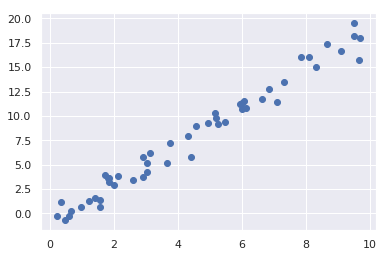

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. モデルの選択
シンプルな線形回帰モデルの計算したいならば、線形回帰クラスをインポートできる。

In [9]:
from sklearn.linear_model import LinearRegression

#### 2. ハイパーパラメータの選択
ここでは`LinearRegression`クラスをインスタンス化し、`fit_intercept`ハイパーパラメータを使用して切片をフィットしたいことを指定する。

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 3. 特徴マトリックスとターゲット配列にデータを並べる

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. データにモデルをフィットさせる

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

`fit()`コマンドはモデルに依存して実行されるいくつかの内部計算を引き起こし、その計算結果はユーザーが確認できるモデル特有のアトリビュートに保存される。Scikit-Learnにおいて、慣例的に`fit()`プロセスの間に導かれた全てのモデルパラメータはアンダースコアが末尾に着けられる。例えば、この線形モデルの場合は次の通りである。

In [13]:
model.coef_

array([1.9776566])

In [14]:
model.intercept_

-0.9033107255311164

これら2つのパラメータはデータに対する線形フィットの傾きと切片を表す。

一般的にScikit-Learnはそれら自身の内部のモデルパラメータから結果を描画するツールを提供していない。

#### 5. 未知のデータに対するラベルの予測

In [15]:
xfit = np.linspace(-1, 11)

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

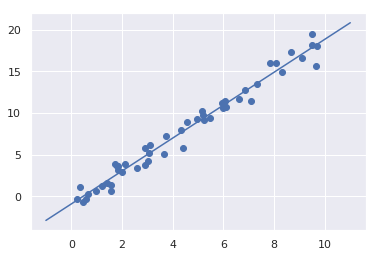

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### 教師あり学習の例：Iris分類
ここでの問題は次の通り。Irisデータの一部で学習したモデルがあたえらたならば、残りのラベルをどれだけよく予測できるかどうか。

このタスクのために、シンプルなGaussian naive Bayesを使用する。それは各クラスが軸に沿ったガウス分布から導かれると仮定することによって計算される。

ここでは、トレーニングセットとテストセットにデータを分ける。これは手動で行うことも出来るが、`train_test_split`関数を使用するのがより便利である。

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [20]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### 教師なし学習の例：Iricの次元性
Irisデータは4次元であることを思い出す。それぞれのサンプルに対して記録された4つの特徴がある。

次元削減のタスクはデータの不可欠な特徴はそのままに、適切な低次元の表現があるかどうかを問うものである。次元削減はしばしばデータの可視化に向けて使用される。実際、4次元以上のものより2次元のデータの方が簡単にプロットできる。

ここではprincipal component analysis (PCA)を使用する。それは早い線形次元削減の技術である。モデルに対して2つのコンポーネントを返すように尋ねる。つまり、データの2次元表現である。

In [22]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

それでは、結果をプロットする。一番の近道は元のIris`DataFrame`に対して毛kkを挿入し、Seabornの`lmplot`で結果を表示することである。

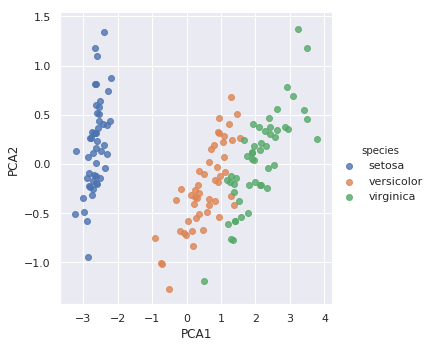

In [23]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

2次元の表現において、PCAアルゴリズムが種のラベルの知識なく、種は十分によく分けられていることが分かる。これは比較的単純な分類がおそらくこのデータセットには有効であろうことを示唆している。

### 教師なし学習：Irisクラスタリング
続いてIrisデータにクラスタリングを適用する。クラスタリングアルゴリズムはどんなラベルに対する参照もないデータの区分けされたグループを探すことを試みる。ここではGaussian mixture model (GMM)と呼ばれるパワフルなクラスタリングメソッドを使用する。

In [25]:
from sklearn.mixture import GaussianMixture as GMM # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

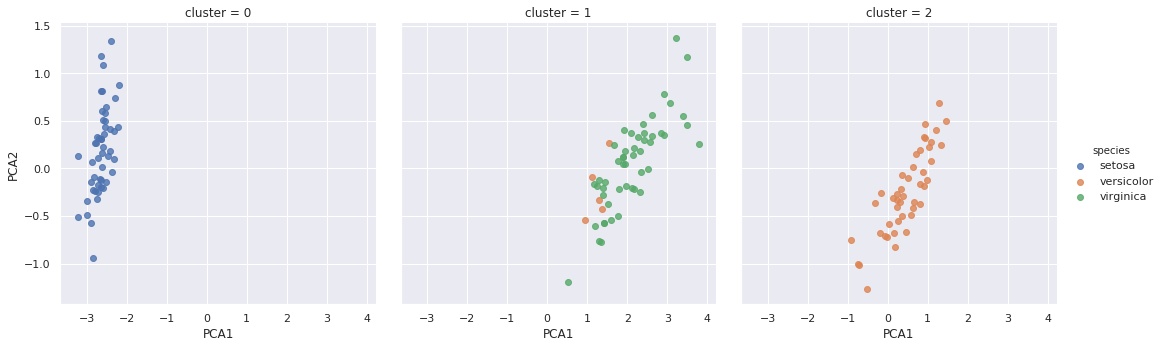

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## 応用：手書きの数字の探検

### Loading and visualizing the digits data

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

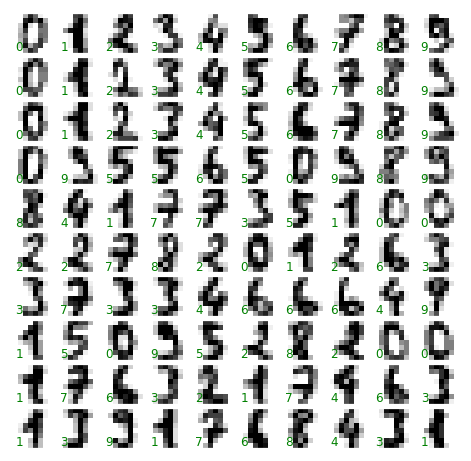

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [29]:
X = digits.data
X.shape

(1797, 64)

In [30]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

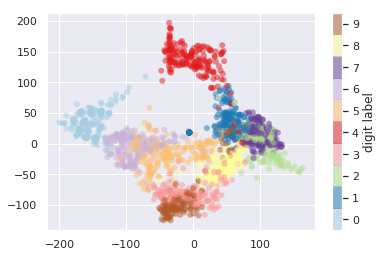

In [34]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

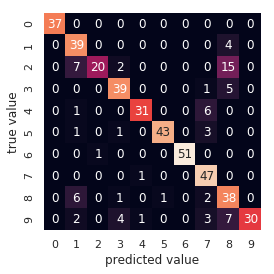

In [38]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

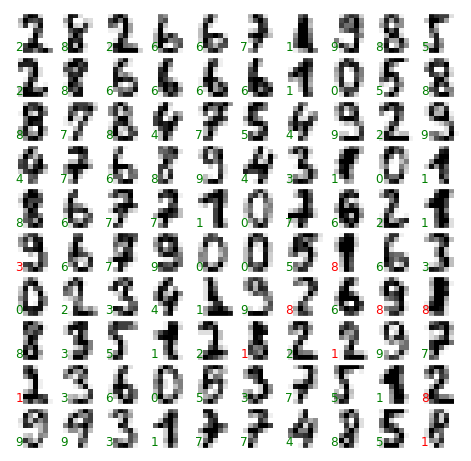

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')